In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers, models, optimizers


(400,)


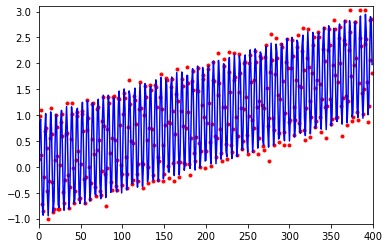

In [21]:
# 시계열 데이터 예측
data_time = np.sin(np.arange(400)) + np.random.normal(0, 0.1, 400) + np.arange(400)/200
print(data_time.shape)
plt.plot(data_time, 'r.')
plt.plot(range(400), np.sin(np.arange(400)) + np.arange(400)/200, 'b')
plt.xlim(-0.5, 400.5)
plt.ylim(-1.1, 3.1)
plt.show()

## MLP

In [22]:
data_matrix = []
seq_len = 3
for i in range(0, len(data_time)-seq_len):
    tmp_data = data_time[i:i+seq_len+1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(397, 4)
[[ 0.15208842  0.97654642  1.09661692  0.22370379]
 [ 0.97654642  1.09661692  0.22370379 -0.71752844]
 [ 1.09661692  0.22370379 -0.71752844 -0.86165535]
 ...
 [ 0.86502977  1.1748172   2.05728083  2.83646718]
 [ 1.1748172   2.05728083  2.83646718  2.8636324 ]
 [ 2.05728083  2.83646718  2.8636324   1.80774516]]


In [23]:
datax = data_matrix_np[:,0:3]
datay = data_matrix_np[:,3]
print(datax.shape)
print(datay.shape)

(397, 3)
(397,)


In [24]:
# Train Data와 Validation Data 분리
trnx = datax[0:300, :]
trny = datay[0:300]
tstx = datax[300:datax.shape[0],:]
tsty = datay[300:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(300, 3)
(97, 3)
(300,)
(97,)


In [25]:
input_shape = (3,)

mlp_model = models.Sequential()
mlp_model.add(layers.Dense(units = 5, activation = 'tanh', input_shape = input_shape))
mlp_model.add(layers.Dense(units = 10, activation = 'tanh' ))
mlp_model.add(layers.Dense(units = 1, activation = 'linear'))

mlp_model.compile(optimizer="Adam", loss = "mean_squared_error", metrics = ['mean_squared_error'])


In [26]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = mlp_model.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=10, epochs=300)

Epoch 1/300
30/30 [==============================] - 0s 5ms/step - loss: 0.7335 - mean_squared_error: 0.7335 - val_loss: 1.4541 - val_mean_squared_error: 1.4541
Epoch 2/300
30/30 [==============================] - 0s 1ms/step - loss: 0.5396 - mean_squared_error: 0.5396 - val_loss: 1.1248 - val_mean_squared_error: 1.1248
Epoch 3/300
30/30 [==============================] - 0s 1ms/step - loss: 0.4380 - mean_squared_error: 0.4380 - val_loss: 1.0338 - val_mean_squared_error: 1.0338
Epoch 4/300
30/30 [==============================] - 0s 1ms/step - loss: 0.3723 - mean_squared_error: 0.3723 - val_loss: 0.9773 - val_mean_squared_error: 0.9773
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 0.3208 - mean_squared_error: 0.3208 - val_loss: 0.9879 - val_mean_squared_error: 0.9879
Epoch 6/300
30/30 [==============================] - 0s 1ms/step - loss: 0.2849 - mean_squared_error: 0.2849 - val_loss: 0.9801 - val_mean_squared_error: 0.9801
Epoch 7/300
30/30 [===============

30/30 [==============================] - 0s 1ms/step - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.2132 - val_mean_squared_error: 0.2132
Epoch 52/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.2066 - val_mean_squared_error: 0.2066
Epoch 53/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.2538 - val_mean_squared_error: 0.2538
Epoch 54/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.2455 - val_mean_squared_error: 0.2455
Epoch 55/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0841 - mean_squared_error: 0.0841 - val_loss: 0.1920 - val_mean_squared_error: 0.1920
Epoch 56/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.2157 - val_mean_squared_error: 0.2157
Epoch 57/300
30/30 [=====================

30/30 [==============================] - 0s 1ms/step - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.1890 - val_mean_squared_error: 0.1890
Epoch 102/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.2064 - val_mean_squared_error: 0.2064
Epoch 103/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.1666 - val_mean_squared_error: 0.1666
Epoch 104/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.2199 - val_mean_squared_error: 0.2199
Epoch 105/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.1948 - val_mean_squared_error: 0.1948
Epoch 106/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.2002 - val_mean_squared_error: 0.2002
Epoch 107/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.1826 - val_mean_squared_error: 0.1826
Epoch 152/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.1589 - val_mean_squared_error: 0.1589
Epoch 153/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.1933 - val_mean_squared_error: 0.1933
Epoch 154/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.1708 - val_mean_squared_error: 0.1708
Epoch 155/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.2001 - val_mean_squared_error: 0.2001
Epoch 156/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.1480 - val_mean_squared_error: 0.1480
Epoch 157/300
30/30 [===============

30/30 [==============================] - 0s 1ms/step - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.1495 - val_mean_squared_error: 0.1495
Epoch 202/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.1722 - val_mean_squared_error: 0.1722
Epoch 203/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.1800 - val_mean_squared_error: 0.1800
Epoch 204/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.1667 - val_mean_squared_error: 0.1667
Epoch 205/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.1742 - val_mean_squared_error: 0.1742
Epoch 206/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.1676 - val_mean_squared_error: 0.1676
Epoch 207/300
30/30 [===============

30/30 [==============================] - 0s 1ms/step - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.1765 - val_mean_squared_error: 0.1765
Epoch 252/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.1567 - val_mean_squared_error: 0.1567
Epoch 253/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.1515 - val_mean_squared_error: 0.1515
Epoch 254/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.1905 - val_mean_squared_error: 0.1905
Epoch 255/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.1597 - val_mean_squared_error: 0.1597
Epoch 256/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.1508 - val_mean_squared_error: 0.1508
Epoch 257/300
30/30 [===============

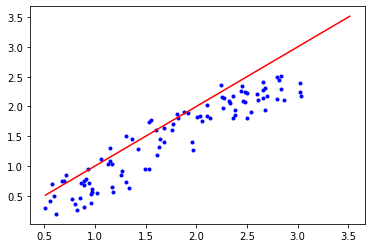

<function matplotlib.pyplot.show(close=None, block=None)>

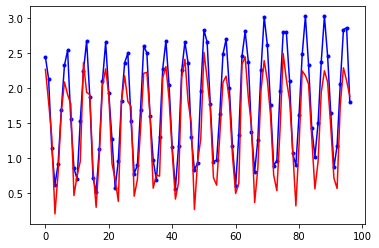

In [30]:
plt.plot(tsty, mlp_model.predict(tstx),'b.')
plt.plot(np.arange(min(tsty), max(tsty)+ 0.5), np.arange(min(tsty), max(tsty)+0.5), 'r')
plt.show()

plt.plot(range(tsty.shape[0]),tsty, 'b.-')
plt.plot(range(tsty.shape[0]),mlp_model.predict(tstx), 'r-')
plt.show

#print("Final validation error is: %f" % history.histroy['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1].)